# Miscellaenous

Just trying stuff out. 

In [2]:
import numpy as np
np.random.seed(42)

In [3]:
#initial state is Gaussian mean 0, covariance sigma_0^2 I_m
#noise is Gaussian mean 0, covariance sigma_z^2 I_m
#cost 1 is k^2/m * squared l2 norm of u_1
# cost 2 is 1/m * squared l2 norm of x_2
def gen_initial_state(dimension, cov_term): 
    '''
    Generates a vector of dimension DIMENSION
    from a multivariate Gaussian distribution.
    Mean is always 0, and covariance is a scalar 
    multiple of the identity matrix.
    
    dimension: An positive integer. The dimension of the vector
    cov_term: A scalar to multiply the covariance matrix by. 
    '''
    return np.random.multivariate_normal(np.zeros(dimension), cov_term * np.eye(dimension))

In [4]:
def cost(control_1, x_2, k): 
    '''
    Cost function. 
    Input: 
    control_1: The u_1 vector
    x_2: The output after control 2
    k: A scalar term weighting the cost of control_1
    '''
    dim = len(control_1)
    return ((k**2)*np.linalg.norm(control_1)**2 + np.linalg.norm(x_2)**2) / dim

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def step_func(step_point): 
    def stepper(x): 
        if x > step_point: 
            return 1
        else: 
            return 0
    return stepper

In [4]:
zero_step = step_func(0)

In [7]:
#[-infty to -7] is -10
#[-7 to 0] is -4
#[0 to 7] is 4 
#[7 to infty] is 10 
def pw_step_function(x_arr): 
    return np.piecewise(x_arr, [x_arr < -7, (x_arr >= -7) & (x_arr < 0), (x_arr >= 0) & (x_arr < 7), x_arr > 7],
            [-10, -4, 4, 10])

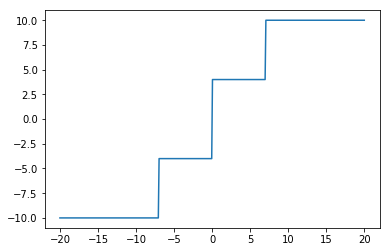

In [31]:
plt.plot(np.linspace(-20, 20, num=400), pw_step_function(np.linspace(-20, 20, num=400)))

In [34]:
pw_step_function(np.random.randint(low=-20, high=20, size=(30, 30))).reshape(-1)

{-10, -4, 0, 4, 10}

In [39]:
pw_step_function(np.array([-1, 0, 1]))

array([-4,  4,  4])

In [10]:
num_x0_points = 300
x0_test = np.linspace(-3*5, 3*5, num=num_x0_points)

In [11]:
def pw_step_function(x_arr): 
  '''
  Performs a piecewise step operation on every element of x_arr.
  x_arr: A numpy 1D array of real numbers of shape (N, )
  returns: A numpy 1D array of shape (N, ) whose values are in [-10, -4, 4, 10]
  '''
  return np.piecewise(x_arr, [x_arr < -7, (x_arr >= -7) & (x_arr < 0), (x_arr >= 0) & (x_arr < 7), x_arr > 7],
    [-10, -4, 4, 10])

In [12]:
x1_test = pw_step_function(x0_test)

In [13]:
x1_test[5].reshape(1, 1)

array([[-10.]])

In [14]:
z_test = np.random.normal(scale=1, size=num_x0_points)

In [15]:
z_test[5].reshape(1, 1)

array([[-0.23413696]])

In [16]:
def pw_step_function(x_arr): 
  '''
  Performs a piecewise step operation on every element of x_arr.
  x_arr: A numpy 1D array of real numbers of shape (N, )
  returns: A numpy 1D array of shape (N, ) whose values are in [-10, -4, 4, 10]
  '''
  return np.piecewise(x_arr, [x_arr < -7, (x_arr >= -7) & (x_arr < 0), (x_arr >= 0) & (x_arr < 7), x_arr > 7],
    [-10, -4, 4, 10])

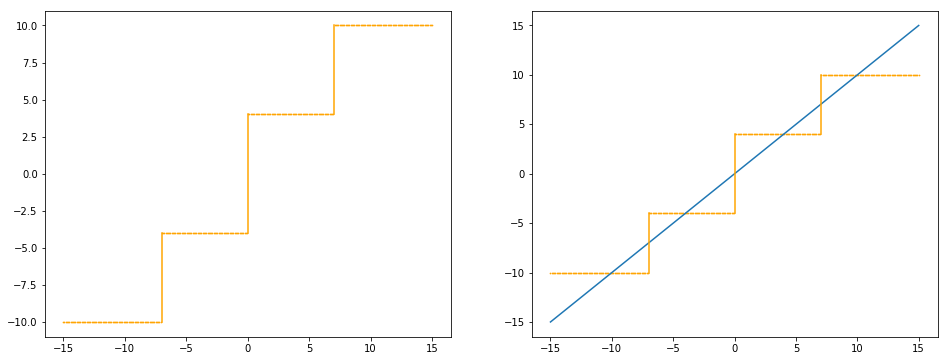

In [23]:
# return np.piecewise(x_arr, [x_arr < -7, (x_arr >= -7) & (x_arr < 0), (x_arr >= 0) & (x_arr < 7), x_arr > 7],
#     [-10, -4, 4, 10])
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(x0_test, pw_step_function(x0_test), c='orange', s=0.5)
plt.plot([-7, -7], [-10, -4], c='orange')
plt.plot([0, 0], [-4, 4], c='orange')
plt.plot([7, 7], [4, 10], c='orange')

plt.subplot(1, 2, 2)
plt.plot(x0_test, x0_test)
plt.scatter(x0_test, pw_step_function(x0_test), c='orange', s=0.5)
plt.plot([-7, -7], [-10, -4], c='orange', s=0.5)
plt.plot([0, 0], [-4, 4], c='orange', s=0.5)
plt.plot([7, 7], [4, 10], c='orange', s=0.5)

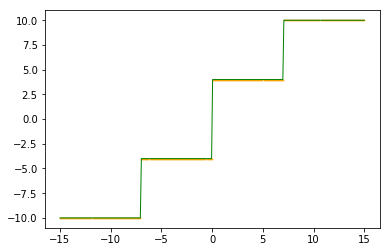

In [29]:
plt.scatter(x0_test, pw_step_function(x0_test), c='orange', s=0.5)
plt.plot(x0_test, pw_step_function(x0_test), c='green', lw=1)